# urban hac reduction figure¶
- This script is used to visualize AC+HEAT reduction;
- Simulations: CNTL, ROOF_DA, IMPRAOD_DA, WALL_DA, ROOF_WALL_DA, ROOF_IMPROAD_WALL_DA;

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import matplotlib.colors as mcolors

In [2]:
f0 = 'hete_lat0.csv'
df0 = pd.read_csv(f0)
f1 = 'hete_lat1.csv'
df1 = pd.read_csv(f1)
f2 = 'hete_lat2.csv'
df2 = pd.read_csv(f2)
f3 = 'hete_lat3.csv'
df3 = pd.read_csv(f3)
f4 = 'hete_lat4.csv'
df4 = pd.read_csv(f4)
f5 = 'hete_lat5.csv'
df5 = pd.read_csv(f5)
f6 = 'hete_lat6.csv'
df6 = pd.read_csv(f6)

In [3]:
# drawing
start_year = 2015
end_year = 2099
linewidth = 0.5
linewidth2 = 1
fontsize = 6
labelfont = 6
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#1235b6'
lc9 = '#05101f'
lc10 = '#952cc6'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2099]
alpha=0.075
handletextpad = 0.5
pad = 1
padt = 0.5
length = 4
xwidth = 0.75
length = 4
padding = 4

proj = ccrs.PlateCarree()
zon = 31
zon2 = 17
linewidth2 = 0.01
linestyle='dashed'
alpha2 = 0.25
title = ['(a) ROOF_0.9 minus CNTL', '(b) ROOF_DA minus CNTL','(c) IMPROAD_DA minus CNTL','(d) WALL_DA minus CNTL', '(e) ROOF_IMPROAD_DA minus CNTL', '(f) ROOF_IMPROAD_WALL_DA minus CNTL']
lc = [lc9, lc3, lc7, lc4, lc9, lc5, lc2]

df1['delta_hac'] = df1['HAC'] -df0['HAC']
df2['delta_hac'] = df2['HAC'] -df0['HAC']
df3['delta_hac'] = df3['HAC'] -df0['HAC']
df5['delta_hac'] = df5['HAC'] -df0['HAC']
df4['delta_hac'] = df4['HAC'] -df0['HAC']
df6['delta_hac'] = df6['HAC'] -df0['HAC']
data = [df1, df2, df3, df5, df4, df6]

xmin = [-4, -0.03,-0.01]
xmax = [1,0.01,0.04]
lsmlat = df2[df2['year']==2015]['lat']

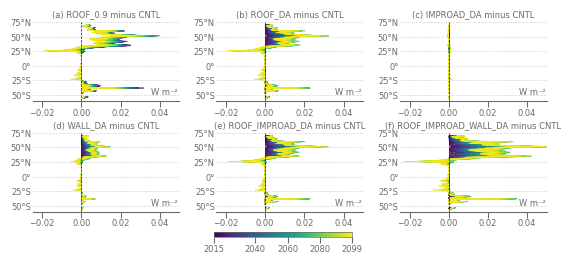

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(5.5, 2.5))
cmap = plt.cm.viridis  # You can choose any colormap you prefer
norm = mcolors.Normalize(vmin=2015, vmax=2099)  # Adjust vmin and vmax according to your data range
ax = axes.flatten()

for i in range(6):
    for j in range(2015, 2099):
        dff = data[i][data[i]['year'] == j]
        ax[i].plot(dff['delta_hac'], dff['lat'], c=cmap(norm(j)), linewidth=linewidth)
    ticks = np.arange(-50, 76, 25)
    ax[i].set_yticks(ticks)
    ax[i].set_ylim(lsmlat[31], 75)
    ax[i].set_xlim(-0.025, 0.05)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_color(labelcolor)
    ax[i].set_yticklabels(['50°S','25°S', '0°', '25°N', '50°N','75°N'])
    ax[i].grid(True, which='major', axis='y',linestyle='--',linewidth=linewidth, alpha=0.5)
    ax[i].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = 0)
    ax[i].tick_params(axis='x', which='major', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='minor', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length/2)
    ax[i].set_title(title[i], fontsize=labelfont, pad=padding, color = labelcolor)
    ax[i].axvline(x=0, color=lc9, linestyle='--', linewidth=linewidth)
    ax[i].set_xlabel('W m⁻²', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax[i].xaxis.set_label_coords(0.9, 0.175)
    
bottom = 0.075
width = 0.25
height = 0.02
left = 0.5 - width/2
ticks = [start_year, 2040, 2060, 2080, end_year]
ticklabels = ['2015', '2040', '2060', '2080', '2099']
cax = fig.add_axes([left, bottom, width, height])    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=axes[0], cax=cax, orientation='horizontal', shrink=0.95, aspect=20, ticks=ticks)
cbar.ax.tick_params(labelsize=labelfont, length=length, color=labelcolor, labelcolor = labelcolor, pad = 1)
cbar.outline.set_edgecolor(labelcolor)
cbar.set_ticklabels(ticklabels)
cbar.outline.set_linewidth(linewidth)

plt.subplots_adjust(left=0.045, right=0.98, bottom=0.175, top=0.935, wspace=0.25, hspace=0.4)       
plt.show()  
fig.savefig('hete_hac.png', dpi=300)

In [5]:
fig.savefig('hete_hac.pdf', dpi=600)

# Description

In [11]:
df2_2015 = df2.loc[df2['year'] == 2015].loc[df2['HAC'] > 0]
print(df2_2015)

     Unnamed: 0        lat   AC      HEAT       HAC  year  delta_hac
37           37 -55.130890  0.0  0.011698  0.011698  2015   0.000047
38           38 -54.188480  0.0  0.011464  0.011464  2015   0.000071
39           39 -53.246075  0.0  0.023558  0.023558  2015   0.000088
41           41 -51.361256  0.0  0.014359  0.014359  2015   0.000115
43           43 -49.476440  0.0  0.000583  0.000583  2015   0.000006
..          ...        ...  ...       ...       ...   ...        ...
166         166  66.439789  0.0  0.060861  0.060861  2015   0.000058
167         167  67.382202  0.0  0.071139  0.071139  2015   0.000079
168         168  68.324608  0.0  0.024505  0.024505  2015   0.000029
169         169  69.267014  0.0  0.137828  0.137828  2015   0.000098
170         170  70.209427  0.0  0.060632  0.060632  2015   0.000082

[123 rows x 7 columns]


In [28]:
row = df2[(df2['lat'] >= 29) & (df2['lat'] <= 30)]
row 

,Unnamed: 0,lat,AC,HEAT,HAC,year,delta_hac
127,127,29.685863,0.013522,0.040096,0.053619,2015,-0.000026
319,319,29.685863,0.013792,0.038674,0.052466,2016,-0.000038
511,511,29.685863,0.013900,0.049754,0.063654,2017,0.000025
703,703,29.685863,0.010825,0.042668,0.053494,2018,-0.000002
895,895,29.685863,0.012287,0.029390,0.041677,2019,-0.000131
...,...,...,...,...,...,...,...
15487,15487,29.685863,0.022472,0.030034,0.052506,2095,-0.003480
15679,15679,29.685863,0.019114,0.024022,0.043136,2096,-0.003588
15871,15871,29.685863,0.020476,0.025095,0.045571,2097,-0.004060
16063,16063,29.685863,0.020059,0.017964,0.038023,2098,-0.003685


In [32]:
print(df1['delta_hac'].max(), df1['delta_hac'].min())

0.0 0.0
